In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

In [2]:
path = '/home/cshu2/clim680/'
fname = 'PM10_202207.nc'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:  (day: 31, time: 24, lay: 35, lat: 265, lon: 442)
Coordinates:
  * day      (day) int32 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lay      (lay) int32 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * lat      (lat) float32 21.83 21.93 22.03 22.13 ... 48.47 48.57 48.67 48.77
  * lon      (lon) float32 -120.6 -120.5 -120.4 -120.3 ... -71.01 -70.91 -70.8
Data variables:
    PM       (day, time, lay, lat, lon) float32 ...

''

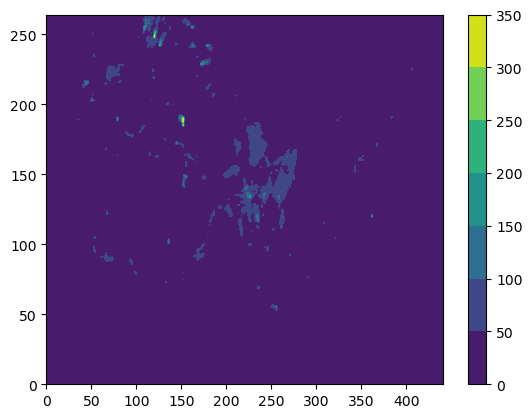

In [3]:
plt.contourf(ds['PM'][0,0,0,:,:])
plt.colorbar() 
;

''

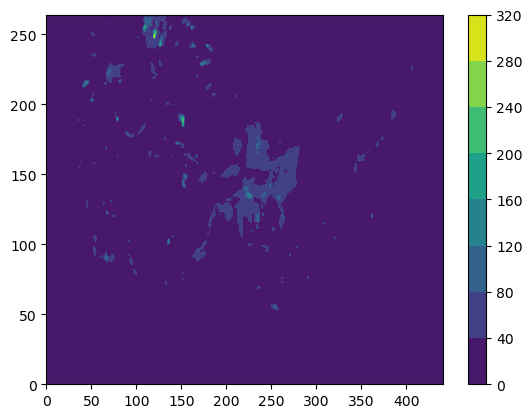

In [4]:
plt.contourf((ds['PM'][0,0,0,:,:]+ds['PM'][0,1,0,:,:])/2)
plt.colorbar() 
;

In [5]:
ds_climo = ds.groupby('time').mean('day')
ds_climo

<xarray.Dataset>
Dimensions:  (time: 24, lay: 35, lat: 265, lon: 442)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lay      (lay) int32 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * lat      (lat) float32 21.83 21.93 22.03 22.13 ... 48.47 48.57 48.67 48.77
  * lon      (lon) float32 -120.6 -120.5 -120.4 -120.3 ... -71.01 -70.91 -70.8
Data variables:
    PM       (time, lay, lat, lon) float32 8.608 8.738 8.881 ... 0.0472 0.04708

''

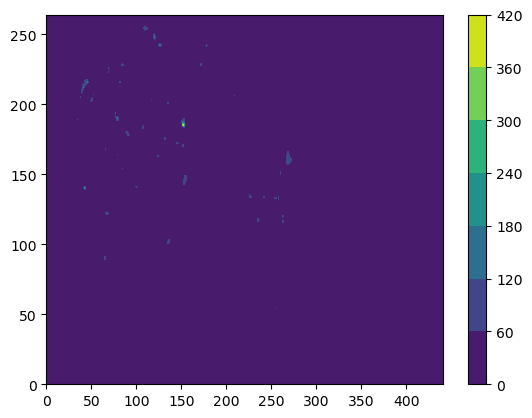

In [6]:
plt.contourf((ds_climo['PM'][0,0,:,:]+ds_climo['PM'][1,0,:,:])/2)
plt.colorbar() 
;

Text(0.5, 0.98, '')

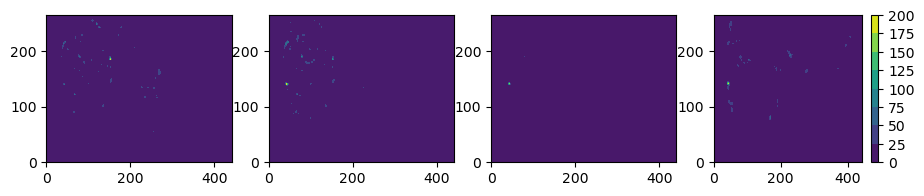

In [7]:
fig = plt.figure(figsize=(11,6.5))
plt.subplot(3,4,1)
plt.contourf((ds_climo['PM'][0,0,:,:]+ds_climo['PM'][1,0,:,:])/2)
plt.subplot(3,4,2)
plt.contourf((ds_climo['PM'][2,0,:,:]+ds_climo['PM'][3,0,:,:])/2)
plt.subplot(3,4,3)
plt.contourf((ds_climo['PM'][4,0,:,:]+ds_climo['PM'][5,0,:,:])/2)
plt.subplot(3,4,4)
plt.contourf((ds_climo['PM'][6,0,:,:]+ds_climo['PM'][7,0,:,:])/2)

plt.colorbar()
plt.suptitle('') #supertitle

Text(0.5, 0.98, 'PM10 (ug m-3)')

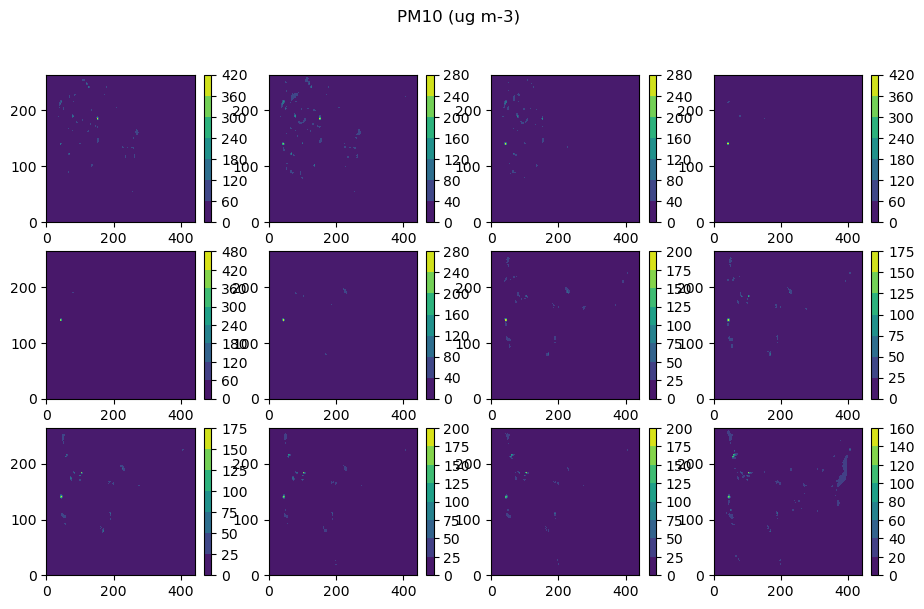

In [8]:
fig = plt.figure(figsize=(11,6.5))
for i in range(0,12,1):
    plt.subplot(3,4,i+1)
    plt.contourf((ds_climo['PM'][i,0,:,:]+ds_climo['PM'][i+1,0,:,:])/2)
    plt.colorbar()
plt.suptitle('PM10 (ug m-3)') #supertitle

Text(0.5, 0.98, 'PM10 (ug m-3)')

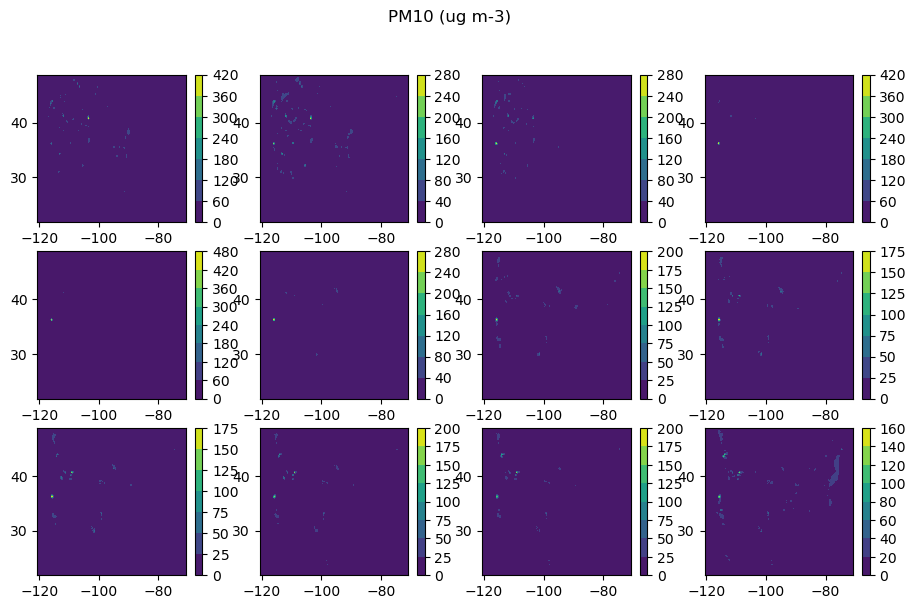

In [9]:
fig = plt.figure(figsize=(11,6.5))
for i in range(0,12,1):
    plt.subplot(3,4,i+1)
    plt.contourf(
        ds_climo['lon'], 
        ds_climo['lat'], 
        (ds_climo['PM'][i,0,:,:]+ds_climo['PM'][i+1,0,:,:])/2
        )
    plt.colorbar()
plt.suptitle('PM10 (ug m-3)') #supertitle

Text(0.5, 0.98, 'PM10 (ug m-3)')

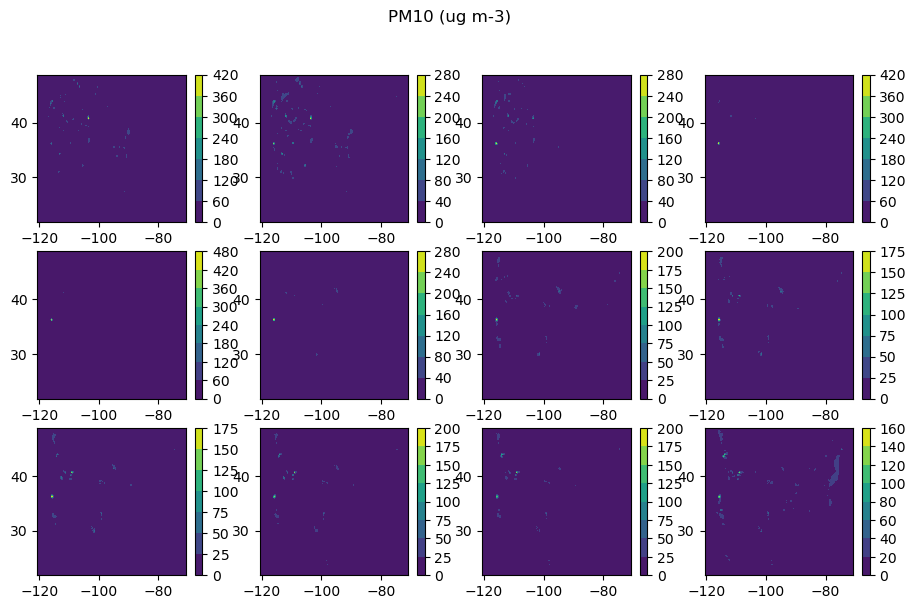

In [10]:
fig = plt.figure(figsize=(11,6.5))
for i in range(0,12,1):
    plt.subplot(3,4,i+1)
    plt.contourf(
        ds_climo['lon'], 
        ds_climo['lat'], 
        (ds_climo['PM'][i,0,:,:]+ds_climo['PM'][i+1,0,:,:])/2
        )
    plt.colorbar()
plt.suptitle('PM10 (ug m-3)') #supertitle

In [11]:
import matplotlib.colors as colors
import cartopy.feature as cfeature
import matplotlib

# Make the figure larger
fig = plt.figure(figsize=(11,6.5))

from matplotlib.cm import ScalarMappable

clevs = [0,4,8,12,16,20,30,40,60,80,100,200,500,1000]
colorslist = ['white','blue','green','yellow','red']
colormap = colors.LinearSegmentedColormap.from_list('123',colorslist,N=13)

norm = matplotlib.colors.BoundaryNorm(clevs,len(clevs))



<Figure size 1100x650 with 0 Axes>

Text(0.5, 0.98, 'CMAQ-output PM10 202207 monthly diurnal mean')

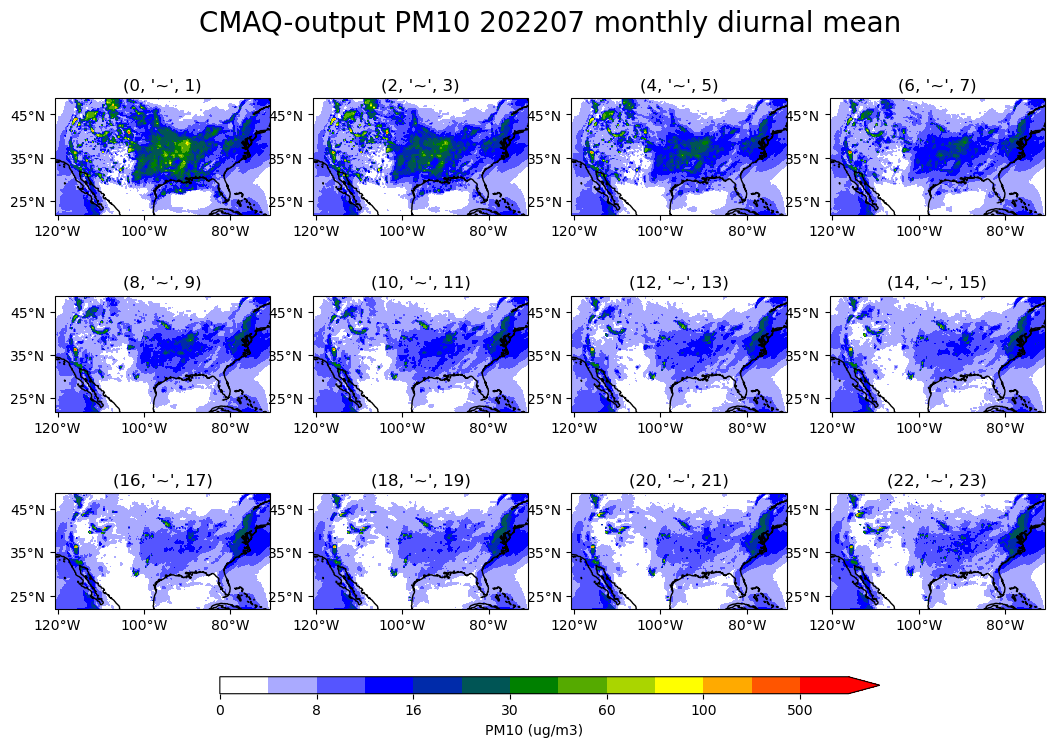

In [12]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=3,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,12,1):

        # Contour plot
        cs=axs[i].contourf(            
            ds_climo['lon'], 
            ds_climo['lat'], 
            (ds_climo['PM'][i,0,:,:]+ds_climo['PM'][i+1,0,:,:])/2,
            clevs,
            cmap = colormap,
            norm = norm,
            extend='max',
            transform = ccrs.PlateCarree(),
        )
        
       # Longitude labels
        axs[i].set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the time
        title = (2*i,'~',2*i+1)
        axs[i].set_title(title)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25) #width and height

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='PM10 (ug/m3)')

# Add a big title at the top
plt.suptitle('CMAQ-output PM10 202207 monthly diurnal mean',fontsize=20)

Text(0.5, 0.98, 'CMAQ-output PM10 202207 monthly diurnal mean')

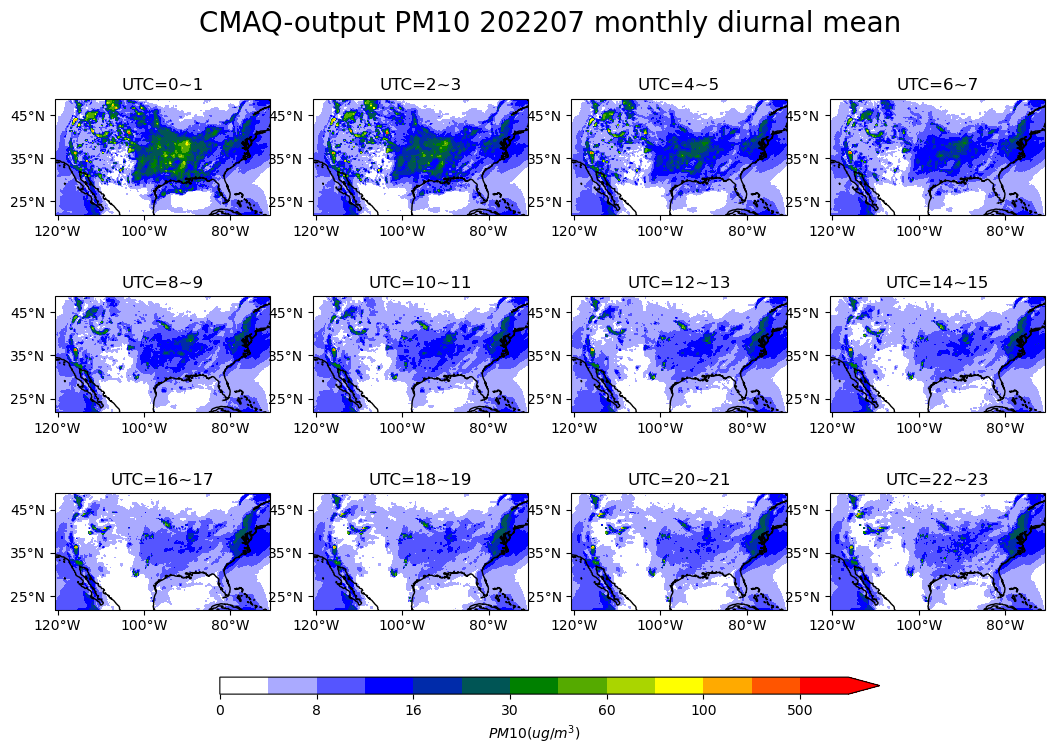

In [17]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=3,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,12,1):

        # Contour plot
        cs=axs[i].contourf(            
            ds_climo['lon'], 
            ds_climo['lat'], 
            (ds_climo['PM'][i,0,:,:]+ds_climo['PM'][i+1,0,:,:])/2,
            clevs,
            cmap = colormap,
            norm = norm,
            extend='max',
            transform = ccrs.PlateCarree(),
        )
        
       # Longitude labels
        axs[i].set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the time
        title = f"UTC={2*i}~{2*i+1}"
        axs[i].set_title(title)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25) #width and height

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='$PM10 (ug/m^{3})$')

# Add a big title at the top
plt.suptitle('CMAQ-output PM10 202207 monthly diurnal mean',fontsize=20)